# Unit 5 - Financial Planning

In [33]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [12]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 5


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response= requests.get(btc_url).json()
btc_price= btc_response ["data"]['1']["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_response=requests.get(eth_url).json()
eth_price=eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value= BTC * btc_price
my_eth_value= ETH * eth_price

# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $66766.80
The current value of your 5.3 ETH is $18539.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version ='v2')

In [23]:
# Format current date as ISO format
current_date = pd.Timestamp ("2021-10-12", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
investment_planning_portfolio = alpaca.get_barset(tickers, timeframe, end=current_date, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
investment_planning_portfolio.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2021-10-12 00:00:00-04:00  114.17  114.380  114.11  114.355  3521504.0   
2021-10-11 00:00:00-04:00  114.01  114.065  113.94  113.940  1999518.0   
2021-10-08 00:00:00-04:00  114.31  114.350  114.07  114.120  4207570.0   
2021-10-07 00:00:00-04:00  114.46  114.500  114.34  114.360  3586652.0   
2021-10-06 00:00:00-04:00  114.68  114.730  114.59  114.700  4748378.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-10-12 00:00:00-04:00  435.67  436.1000  432.78  433.63  61078594.0  
2021-10-11 00:00:00-04:00  437.16  440.2600  434.62  434.67  54993389.0  
2021-10-08 00:00:00-04:00  439.48  439.8900  437.19  437.82  57510090.0  
2021-10-07 00:00:00-04:00  438.39  441.6800  438.20  438.64  64139858.0  
2021-10-06 00:00:00-04:00  429.27  435.1199  427.54  434.92  99477866.0

In [25]:
# Pick AGG and SPY close prices
agg_close_price = investment_planning_portfolio["AGG"]["close"][0]
spy_close_price = investment_planning_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.355
Current SPY closing price: $433.63


In [26]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21681.50
The current value of your 200 AGG shares is $22871.00


### Savings Health Analysis

In [39]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
stocks = my_agg_value + my_spy_value
savings = {'Total':[crypto, stocks]}
# Create savings DataFrame
df_savings = pd.DataFrame(savings, index = ['crypto', 'stocks'])

# Display savings DataFrame
print(df_savings)

            Total
crypto  85306.147
stocks  44552.500


<AxesSubplot:title={'center':'Breakdown of Portfolio'}, ylabel='Total'>

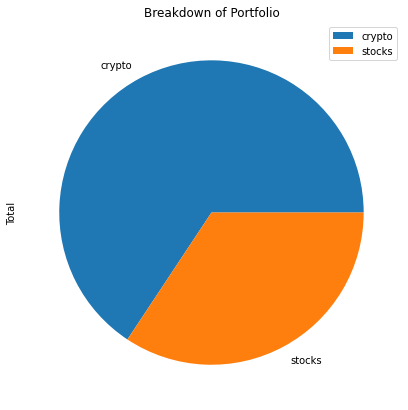

In [41]:
# Plot savings pie chart
df_savings.plot.pie(y="Total", figsize=(15,7), title="Breakdown of Portfolio")

In [43]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = float(df_savings.sum())

# Validate saving health
if savings > emergency_fund:
    print("There is enough money in your emergency fund")
elif savings == emergency_fund:
    print("You have met your emergency fund goal")
else:
    print(f"You are ${(emergency_fund - savings):.2f}) away from reaching your emergency fund goal")

There is enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-12', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-10-12', tz='America/Chicago').isoformat()

In [45]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data= alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997.0   
2017-10-25 00:00:00-04:00  108.96  109.130  108.95  109.110  2706969.0   
2017-10-26 00:00:00-04:00  109.20  109.229  108.98  109.000  1488075.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-20 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-23 00:00:00-04:00  257.48  257.51  256.02  256.15  36345830.0  
2017-10-24 00:00:00-04:00  256.59  256.83  256.15  256.55  51308377.0  
2017-10-25 00:00:00-04:00  256.19  256.31  254.00  255.30  72200254.0  
2017-10-26 00:00:00-04:00  255.99  256.30  255.56  255.59  37718330.0

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_30= MCSimulation(portfolio_data=df_stock_data, weights=[.4,.6], num_simulation=500, num_trading_days=252*30)

In [47]:
# Printing the simulation input data
Monte_Carlo_30.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997.0   
2017-10-25 00:00:00-04:00  108.96  109.130  108.95  109.110  2706969.0   
2017-10-26 00:00:00-04:00  109.20  109.229  108.98  109.000  1488075.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-20 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-23 00:00:00-04:00     0.000961  257.48  257.51  256.02  256.15   
2017-10-24 00:00:00-04:00    -0.001919  256.59  256.83  256.15  256.55   
2017-10-25 00:00:00-04:00    -0.000824  256.19  256.31  254.00  255.30   
2017-10-26 00:00:00-04:00    -0.001008  255.99  256.30  255.56  255.59   

                                                    
                               volume daily_return  
time                                                
2017-10-20 00:00:00-04:00         NaN          NaN  
2017-10-23 00:00:00-04:00  36345830.0          NaN  
2017-10-24 00:00:00-04:00  51308377.0     0.001562  
2017-10-25 00:00:00-04:00  72200254.0    -0.004872  
2017-10-26 00:00:00-04:00  37718330.0     0.001136

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999225,1.011920,0.985272,1.016223,0.990983,0.996024,0.996098,1.012229,1.005095,1.009981,...,1.009096,1.008708,1.010665,0.998578,1.012099,1.009058,1.002269,1.005892,1.007348,0.999122
2,1.015935,1.009871,0.987654,1.025456,1.000382,1.005660,0.988347,1.028137,0.998395,1.020107,...,1.003411,1.014406,0.999884,0.998469,1.017606,1.014120,1.005441,0.998224,1.007543,0.987074
3,1.017745,1.020332,1.001395,1.029464,1.006317,0.998787,0.992040,1.028852,1.008365,1.029611,...,0.995136,1.012066,0.988186,0.995585,1.031952,1.002206,1.000949,0.999464,1.006895,0.986126
4,1.014971,1.012942,1.002394,1.020238,1.005093,0.993829,0.994539,1.027437,1.001511,1.019086,...,0.994992,1.015666,0.988201,0.989107,1.054341,1.009586,0.994652,1.006290,1.004296,0.981716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.923829,4.683936,9.535217,4.931505,17.807646,28.533539,17.206147,7.554468,25.589423,5.758481,...,18.129786,5.271636,14.421715,10.632267,29.395985,7.007465,13.345057,12.638437,12.265434,33.182226
7557,10.885183,4.699046,9.467476,4.954103,17.720681,28.596527,17.039155,7.512949,25.630020,5.685188,...,17.997166,5.309719,14.317153,10.720248,29.411761,7.020156,13.304273,12.716482,12.429934,33.302524
7558,11.025612,4.701491,9.524447,4.918375,17.987764,28.253451,16.911259,7.562876,25.723152,5.769854,...,18.059642,5.308637,14.377842,10.730070,29.736776,7.028061,13.227596,12.630748,12.473153,33.315292
7559,10.963452,4.659457,9.616375,4.893105,17.969164,28.412648,17.054393,7.503130,25.665699,5.814870,...,18.217812,5.299392,14.614980,10.805567,29.676736,7.008818,13.235784,12.449422,12.547022,33.354316


AxesSubplot(0.125,0.125;0.775x0.755)


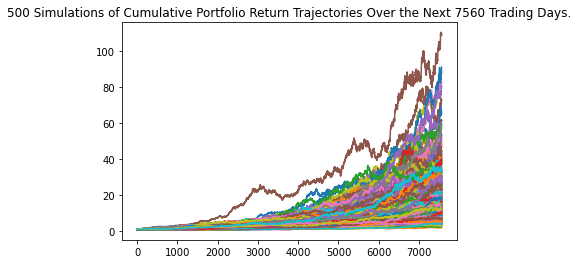

In [52]:
# Plot simulation outcomes
line_plot= Monte_Carlo_30.plot_simulation()
print(line_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


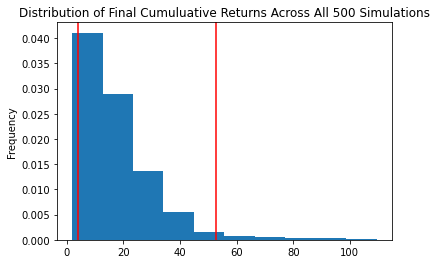

In [54]:
# Plot probability distribution and confidence intervals
distribut_plot= Monte_Carlo_30.plot_distribution()
print(distribut_plot)

### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_stats = Monte_Carlo_30.summarize_cumulative_return()

# Print summary statistics
print(retirement_stats)

count           500.000000
mean             18.098302
std              13.948535
min               1.889679
25%               8.871002
50%              14.307594
75%              23.201820
max             109.422283
95% CI Lower      3.775204
95% CI Upper     52.793826
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [62]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((retirement_stats[8]* initial_investment), 2)
ci_upper = round((retirement_stats[9]* initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75504.07 and $1055876.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [63]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((retirement_stats[8]* initial_investment),2)
ci_upper = round((retirement_stats[9]* initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113256.11 and $1583814.78


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Monte_Carlo_5 = MCSimulation(portfolio_data=df_stock_data, weights=[.0, 1], num_simulation=500, num_trading_days=252*5)

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Monte_Carlo_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010888,0.989158,1.006351,0.998659,0.990658,1.040880,1.023467,0.994989,1.003214,0.990621,...,0.968001,0.995207,0.992817,1.019473,0.986746,0.983526,1.002509,0.989463,1.001136,0.992061
2,1.017279,0.963748,1.000101,0.995281,0.993432,1.044313,1.025241,0.985270,0.994557,1.013977,...,0.967316,0.994349,0.989038,1.012704,0.979769,0.975714,1.001011,0.976863,1.002364,0.994449
3,1.028590,0.962049,0.992201,1.000119,1.001442,1.031074,1.040130,0.978681,1.001499,1.000487,...,0.973379,0.986452,0.968557,1.013916,0.969783,0.964446,0.981447,0.974099,1.010601,0.985076
4,1.029771,0.970470,1.018598,1.004755,1.002513,1.062232,1.047402,0.970583,1.003836,1.015499,...,0.992324,0.971086,0.953651,1.011959,0.950530,0.963015,0.971270,0.981783,0.984922,0.978170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.872980,1.731187,2.052012,2.430423,3.191026,3.911607,1.864625,2.719524,1.100291,1.172517,...,1.888727,1.792777,0.939300,2.330338,1.776955,0.753476,1.856989,1.804439,1.395856,3.172749
1257,0.861434,1.709335,2.069311,2.452066,3.162282,3.817683,1.868843,2.695493,1.124894,1.155779,...,1.866154,1.794187,0.939294,2.318231,1.776850,0.763721,1.845878,1.811447,1.390616,3.143518
1258,0.875889,1.758502,2.112626,2.478319,3.175866,3.787951,1.864563,2.716270,1.130301,1.148899,...,1.852799,1.814990,0.925116,2.315115,1.755034,0.758714,1.821852,1.808337,1.389286,3.120551
1259,0.871731,1.725958,2.121508,2.435583,3.229855,3.756978,1.902755,2.725857,1.152259,1.146361,...,1.861685,1.791511,0.917740,2.272470,1.714734,0.752896,1.834513,1.818325,1.393160,3.159697


AxesSubplot(0.125,0.125;0.775x0.755)


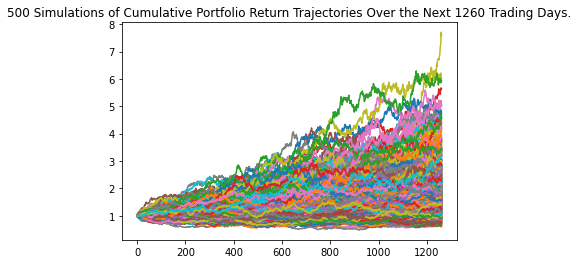

In [68]:
# Plot simulation outcomes
line_5 = Monte_Carlo_5.plot_simulation()
print(line_5)

AxesSubplot(0.125,0.125;0.775x0.755)


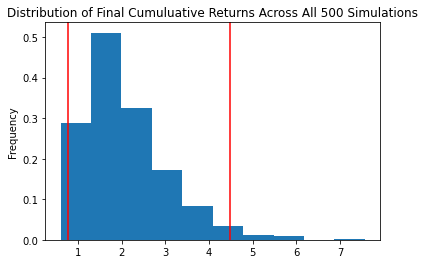

In [69]:
# Plot probability distribution and confidence intervals
distribution_5= Monte_Carlo_5.plot_distribution()
print(distribution_5)

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = Monte_Carlo_5.summarize_cumulative_return()

# Print summary statistics
print(summary_5)

count           500.000000
mean              2.071727
std               0.962758
min               0.599093
25%               1.403504
50%               1.899054
75%               2.552891
max               7.569212
95% CI Lower      0.765625
95% CI Upper      4.483120
Name: 1260, dtype: float64


In [74]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((summary_5[8]* initial_investment), 2)
ci_upper_five = round((summary_5[9]* initial_investment), 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $76562.5 and $448312.0


### Ten Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Monte_Carlo_10 = MCSimulation(portfolio_data=df_stock_data, weights=[0, 1], num_simulation=500, num_trading_days=252*10)

In [76]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Monte_Carlo_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.966900,0.989878,0.999219,0.993373,0.999800,1.022080,0.995706,1.020038,1.006905,1.008167,...,1.010477,1.003643,1.012969,1.004002,1.000869,0.991589,1.004204,1.012837,0.971576,1.009444
2,0.982690,0.982349,1.016566,0.996881,0.980650,1.028137,0.986402,1.009368,1.025183,0.998737,...,0.990572,1.025350,0.994797,1.021734,1.004942,1.000081,1.028917,1.012230,0.973167,1.000070
3,0.962116,0.991968,1.013722,1.013098,0.985786,1.043638,0.978921,1.008600,1.038207,1.003654,...,0.972536,0.999376,1.000578,1.013181,1.004298,1.000152,1.054018,0.996169,0.990201,1.006199
4,0.949640,0.973143,1.012190,1.034388,0.984687,1.049602,0.993153,1.015164,1.010392,0.995370,...,0.991336,1.005383,0.977047,1.009002,0.999788,1.009207,1.063448,1.002248,0.976514,0.987172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.963805,10.478705,1.671613,5.184541,3.539426,5.696321,3.764248,2.055951,2.289994,1.505764,...,1.110584,4.742791,8.398684,1.583734,2.021817,7.652176,1.083666,3.510828,2.737764,2.320379
2517,5.994469,10.480260,1.651922,5.143713,3.517596,5.755623,3.725091,2.017415,2.274529,1.531983,...,1.110148,4.771543,8.414562,1.563984,2.045306,7.702502,1.099452,3.503872,2.695492,2.349831
2518,5.926918,10.467009,1.663835,5.211922,3.536239,5.860756,3.791343,2.052941,2.258578,1.505643,...,1.092932,4.808519,8.584476,1.576495,2.038593,7.771823,1.084658,3.427335,2.691028,2.339629
2519,5.907537,10.482683,1.667816,5.259311,3.490668,5.818949,3.790713,2.014705,2.245434,1.472350,...,1.091334,4.854292,8.557837,1.585447,2.037996,7.595093,1.046414,3.420484,2.683410,2.387022


AxesSubplot(0.125,0.125;0.775x0.755)


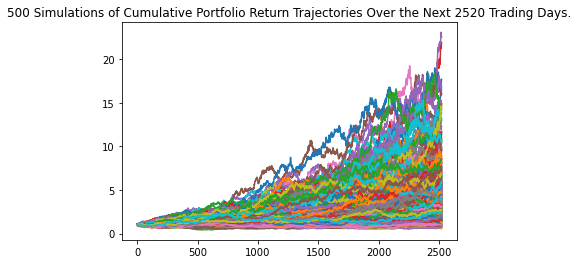

In [77]:
# Plot simulation outcomes
line_10 = Monte_Carlo_10.plot_simulation()
print(line_10)

AxesSubplot(0.125,0.125;0.775x0.755)


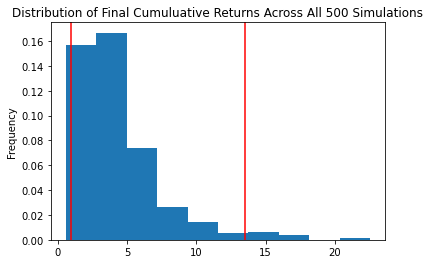

In [78]:
# Plot probability distribution and confidence intervals
distribution_10 = Monte_Carlo_10.plot_distribution()
print(distribution_10)

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = Monte_Carlo_10.summarize_cumulative_return()

# Print summary statistics
print(summary_10)

count           500.000000
mean              4.350101
std               3.103838
min               0.578931
25%               2.333784
50%               3.424416
75%               5.454484
max              22.540669
95% CI Lower      0.987147
95% CI Upper     13.504219
Name: 2520, dtype: float64


In [80]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((summary_10[8]* initial_investment), 2)
ci_upper_ten = round((summary_10[9]* initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $98714.65 and $1350421.91
